<a href="https://colab.research.google.com/github/hws2002/Master-Python-with-Just-One-Book-ADP/blob/main/Chapter6/Chapter6_5_Support_Vector_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. scikit-learn의 LinearSVC

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

c = pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/classification.csv")
c

,age,interest,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0
...,...,...,...
292,27.697220,18.799309,0.0
293,15.150959,72.000352,1.0
294,22.264378,68.453459,1.0
295,25.677420,90.118212,1.0


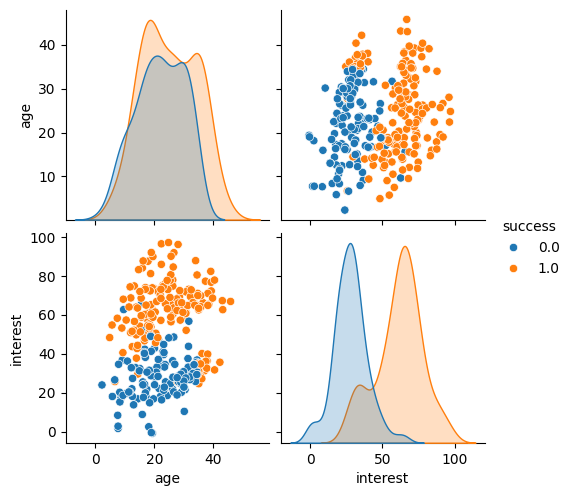

In [ ]:
# 데이터의 클래스 분포를 산점도로 살펴보자
sns.pairplot(hue='success', data = c)

In [ ]:
# 학습데이터와 평가데이터 분리
from sklearn.model_selection import train_test_split

x = c.iloc[:,0:2]
y = c.loc[:,'success']
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, stratify = y, random_state = 1)

In [ ]:
# SVM은 특성의 스케일에 민감하기 때문에 scikit-learn의 StandardScaler를 사용하면
# 좀 더 예측력높은 결정경계를 생성할 수 있다.

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)
# sns.pairplot(data = pd.concat())

In [ ]:
# svc로 모델을 만들고 적합해보자
from sklearn.svm import SVC

clf = SVC(C=.5, random_state = 45)
clf.fit(X_train_sc, y_train)

SVC(C=0.5, random_state=45)

정확도 	95.56%
정밀도 	96.08%
재현율 	96.08%
F1	96.08%


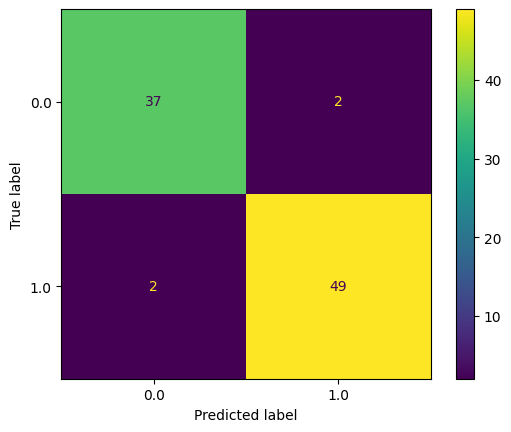

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay


pred = clf.predict(X_test_sc)
acc = accuracy_score(y_test, pred)
prc = precision_score(y_test, pred)
rcll = recall_score(y_test, pred)
f1 = f1_score(y_test, pred)
ConfusionMatrixDisplay.from_estimator(clf, X_test_sc, y_test)

print("정확도 \t{}%".format(round(acc*100,2)))
print("정밀도 \t{}%".format(round(prc*100,2)))
print("재현율 \t{}%".format(round(rcll*100,2)))
print("F1\t{}%".format(round(f1*100,2)))

c : 1
(64, 2)
c : 500
(59, 2)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


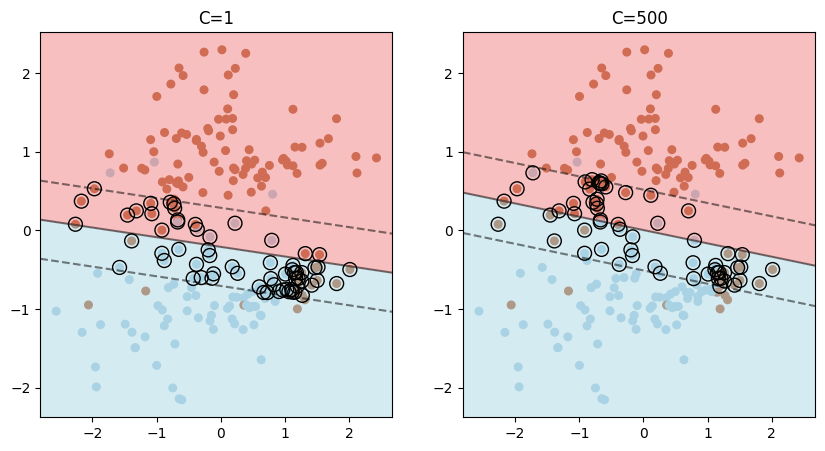

In [66]:
# 하이퍼파라미터 C에 따른 마진의 변화를 살펴보자
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC

plt.figure(figsize=(10,5))

for i ,C in enumerate([1,500]):
  clf = LinearSVC(C = C, loss = 'hinge', random_state = 42).fit(X_train_sc, y_train)
  # decision_function으로 서포트 벡터 얻기
  decision_function = clf.decision_function(X_train_sc)
  support_vector_indices = np.array(np.where(np.abs(decision_function) <= 1 + 1e-15))
  support_vectors = X_train_sc[support_vector_indices].reshape(-1,2)
  # print(support_vectors)
  print("c :",C)
  print(support_vectors.shape)

  plt.subplot(1,2,i+1)
  plt.scatter(X_train_sc[:,0], X_train_sc[:,1], c = y_train, s = 30, cmap = plt.cm.Paired)
  ax = plt.gca()
  xlim = ax.get_xlim()
  ylim = ax.get_ylim()
  xx, yy = np.meshgrid(
      np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50)
  )
  Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.contour(
      xx,
      yy,
      Z,
      colors = 'k',
      levels = [-1,0,1],
      alpha = 0.5,
      linestyles = ['--','-','--']
  )

  plt.contourf(xx, yy, Z, levels = [Z.min(), 0, Z.max()], colors = ['lightblue', 'lightcoral'], alpha = 0.5)

  plt.scatter(
      support_vectors[:,0],
      support_vectors[:,1],
      s = 100,
      linewidth=1,
      facecolors = 'none',
      edgecolors='k'
  )
  plt.title("C="+str(C))
plt.show()

# 2. scikit-learn의 SVR

임의의 데이터로 SVR을 사용한 회귀분석을 진행해보자.

In [109]:
import numpy as np
np.random.seed(0)
X = np.sort(5 * np.random.rand(40,1), axis = 0)
y = np.sin(X).ravel()

print(X[0:6], '\n\n', y[0:10])

[[0.093949  ]
 [0.10109199]
 [0.35518029]
 [0.4356465 ]
 [0.59137213]
 [0.71676644]] 

 [0.09381086 0.10091989 0.34775941 0.4219966  0.55750066 0.65695022
 0.96940081 0.94059723 0.87637482 0.8538402 ]


In [110]:
# 타깃 데이터에 노이즈 추가하기
y[::5] += 3 * (0.5 - np.random.rand(8))

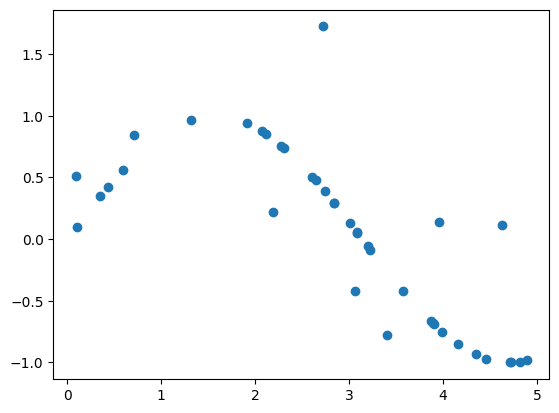

In [111]:
plt.scatter(X.reshape(1,-1),y)
plt.show()

In [112]:
# 커널 함수를 각각 랜덤포레스트, 선형 회귀, 다항회귀로 설정한 뒤 SVR모델을 구축해보자.
from sklearn.svm import SVR

svr_rbf = SVR(kernel = 'rbf', C = 100, gamma=0.1, epsilon = 0.1)
svr_lin = SVR(kernel = 'linear', C = 100, gamma = "auto")
svr_poly = SVR(kernel = 'poly', C = 100, gamma = "auto", degree = 3, epsilon = 0.1, coef0 = 1)

svr_rbf.fit(X, y)
svr_lin.fit(X,y)
svr_poly.fit(X,y)

SVR(C=100, coef0=1, gamma='auto', kernel='poly')

In [113]:
rbf_pred = svr_rbf.predict(X)
lin_pred = svr_lin.predict(X)
poly_pred = svr_poly.predict(X)

from sklearn.metrics import mean_squared_error, mean_absolute_error
preds = [rbf_pred, lin_pred, poly_pred]
kernel = ['Gaussian','Linear','Polynomial']
evls = ['mse','rmse','mae']

results = pd.DataFrame(index = kernel, columns = evls)
for pred, nm in zip(preds, kernel):
  mse = mean_squared_error(y,pred)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(y,pred)

  results.loc[nm,'mse'] = round(mse,2)
  results.loc[nm,'rmse'] = round(rmse,2)
  results.loc[nm,'mae'] = round(mae,2)
results

,mse,rmse,mae
Gaussian,0.12,0.34,0.19
Linear,0.26,0.51,0.39
Polynomial,0.12,0.35,0.18


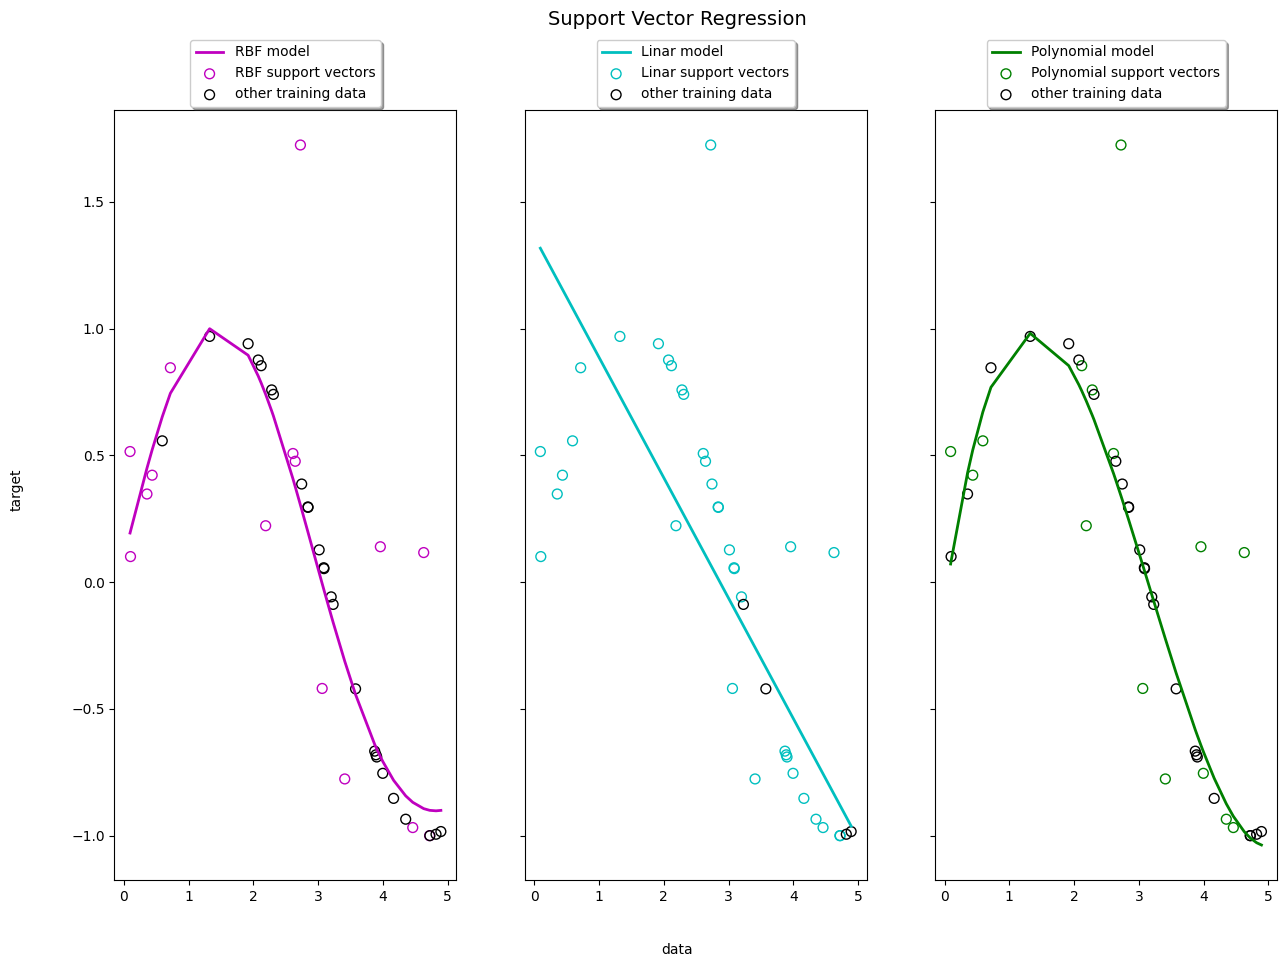

In [118]:
# 세가지 종류의 SVR 모형이 실제 데이터에 어떠한 형태로 적합되었는지 시각화해보자
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ['RBF', 'Linar' ,'Polynomial']
model_color = ['m' ,'c', 'g']

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15,10), sharey = True)

for ix, svr in enumerate(svrs):
  axes[ix].plot(
      X,
      svr.predict(X),
      color=model_color[ix],
      lw=lw,
      label="{} model".format(kernel_label[ix])
  )
  axes[ix].scatter(
      X[svr.support_],
      y[svr.support_],
      facecolor = 'none',
      edgecolor = model_color[ix],
      s = 50,
      label="{} support vectors".format(kernel_label[ix])
  )

  other_indices = np.setdiff1d(np.arange(len(X)), svr.support_)
  # other_indices = list(x not in svr.support_ for x in np.arange(len(X)))

  # other_indices = []
  # for x in range(len(X)):
    # if x not in svr.support_:
      # other_indices.append(x)

  axes[ix].scatter(
      X[other_indices],
      y[other_indices],
      facecolor = 'none',
      edgecolor = 'k',
      s = 50,
      label = "other training data"
  )

  axes[ix].legend(
      loc = 'upper center',
      bbox_to_anchor = (0.5, 1.1),
      ncol = 1,
      fancybox = True,
      shadow = True
  )

fig.text(0.5, 0.04, "data", ha = "center", va= "center")
fig.text(0.06, 0.5, "target", ha = "center", va = "center", rotation = "vertical")
fig.suptitle("Support Vector Regression", fontsize= 14)
plt.show()